This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [210]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'CMXLH9EshczW3BgqsBKi'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [211]:
pip list


Package                            Version
---------------------------------- -----------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
appdirs                            1.4.4
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.3.3
astropy                            4.0
atomicwrites                       1.3.0
attrs                              19.3.0
autopep8                           1.4.4
Babel                              2.8.0
backcall                           0.1.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.8.2
bitarray                           1.2.1
bkcharts                           0.2


In [212]:
pip install quandl


Note: you may need to restart the kernel to use updated packages.


In [213]:
pip list


Package                            Version
---------------------------------- -----------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
appdirs                            1.4.4
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.3.3
astropy                            4.0
atomicwrites                       1.3.0
attrs                              19.3.0
autopep8                           1.4.4
Babel                              2.8.0
backcall                           0.1.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.8.2
bitarray                           1.2.1
bkcharts                           0.2


In [214]:
# First, import the relevant modul
import requests

res = requests.get('https://www.quandl.com/')

print(res)


<Response [200]>


In [215]:
if res:
    print('Response OK')
else:
    print('Response Failed')

Response OK


{'Allow': 'GET, HEAD, POST, PUT, DELETE, OPTIONS, PATCH', 'Cache-Control': 'no-store', 'Content-Encoding': 'gzip', 'Content-Security-Policy': "frame-ancestors 'self';", 'Content-Type': 'text/html; charset=utf-8', 'Date': 'Sun, 14 Mar 2021 15:42:23 GMT', 'ETag': 'W/"b23888ebcd65d1dbe03a912a1a9db04c"', 'Pragma': 'no-cache', 'Referrer-Policy': 'origin-when-cross-origin', 'Server': 'openresty', 'Set-Cookie': 'user_uuid=b9284134-a8e7-4d65-9531-58a2aa184f90; path=/; expires=Thu, 14 Mar 2041 15:42:23 -0000, visid_incap_2261005=hrhTkknOSc2NhsQsLW97R98uTmAAAAAAQUIPAAAAAADSoqhrBKOCetpteRpj61M6; expires=Mon, 14 Mar 2022 11:20:23 GMT; HttpOnly; path=/; Domain=.quandl.com; Secure; SameSite=None, nlbi_2261005=PvhTCm5E2GwL0RXFgSMXTwAAAAAZ7D89a5BUaN1NPPCQZ1hB; path=/; Domain=.quandl.com; Secure; SameSite=None, incap_ses_1162_2261005=zwYrGGGcLFFS4e/KHUEgEN8uTmAAAAAAyyVQj+KZtjySSzerfebWTQ==; path=/; Domain=.quandl.com; Secure; SameSite=None', 'Strict-Transport-Security': 'max-age=31536000; includeSubDom
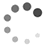

In [216]:
print(res.headers)
print('----------------------------')
print(res.text)

In [217]:
import quandl                                   # from quandl API syntax
#print(quandl)
#quandl.ApiConfig.api_key = 'CMXLH9EshczW3BgqsBKi'
#data = quandl.get("XFRA/AGB2_UADJ",start_date="2017-01-01", end_date="2017-12-31")
#print(data)

In [218]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

In [219]:
params = dict(api_key=API_KEY, start_date='2017-01-01', end_date='2017-01-01')         #from reuest.get syntax
#api_key=API_KEY
#print(params)
#print(API_KEY)
data = requests.get('https://www.quandl.com/api/v3/datasets/XFRA/AGB2_UADJ', params=params)
print(data.json())
#print(data.text)

{'dataset': {'id': 46157305, 'dataset_code': 'AGB2_UADJ', 'database_code': 'XFRA', 'name': 'Agrana Beteiligungs AG (AGB2) Unadjusted Stock Prices', 'description': ' <b>Ticker</b>: AGB2 <br> <br> <b>Exchange</b>: XFRA <br> <br> Columns: <br> <br> Open,High,Low,Close,Volume are unadjusted and shown in EUR currency. <br> <br> Adjustment Factor shows the factor by which prices are adjusted on days which adjustments take place <br> <br> Adjustment Type is a number representing the type of adjustment. Refer to documentation for more information on these codes.', 'refreshed_at': '2021-03-13T05:55:27.505Z', 'newest_available_date': '2018-11-30', 'oldest_available_date': '2007-01-02', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor', 'Adjustment Type'], 'frequency': 'daily', 'type': 'Time Series', 'premium': True, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2017-01-01', 'end_date': '2017-01-01', 'data': [], 'collapse': None, 'orde

In [220]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure


#description : Json structure has 1 nested object which has 21 properties. In which column_name and data properties  
#contain array values.

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [221]:
import json
params = dict(api_key=API_KEY, start_date='2017-01-01', end_date='2017-12-31')         #from reuest.get syntax
#print(params)
data = requests.get('https://www.quandl.com/api/v3/datasets/XFRA/AGB2_UADJ', params=params)
#print(type(data))
jsonDict = data.json()
#print(jsonDict)
#print(type(jsonDict))
print(str(jsonData))


{'dataset': {'id': 46157305, 'dataset_code': 'AGB2_UADJ', 'database_code': 'XFRA', 'name': 'Agrana Beteiligungs AG (AGB2) Unadjusted Stock Prices', 'description': ' <b>Ticker</b>: AGB2 <br> <br> <b>Exchange</b>: XFRA <br> <br> Columns: <br> <br> Open,High,Low,Close,Volume are unadjusted and shown in EUR currency. <br> <br> Adjustment Factor shows the factor by which prices are adjusted on days which adjustments take place <br> <br> Adjustment Type is a number representing the type of adjustment. Refer to documentation for more information on these codes.', 'refreshed_at': '2021-03-13T05:55:27.505Z', 'newest_available_date': '2018-11-30', 'oldest_available_date': '2007-01-02', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor', 'Adjustment Type'], 'frequency': 'daily', 'type': 'Time Series', 'premium': True, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2017-01-01', 'end_date': '2017-12-31', 'data': [['2017-12-29', 103.333, 10

In [249]:
#data = pd.DataFrame(dict(nested_data=jsonDict))                                                                    #question 
#data.head()
df = pd.DataFrame.from_dict(jsonDict, orient='columns')
df.head

<bound method NDFrame.head of                                                                  dataset
collapse                                                            None
column_index                                                        None
column_names           [Date, Open, High, Low, Close, Volume, Adjustm...
data                   [[2017-12-29, 103.333, 103.999, 103.288, 103.2...
database_code                                                       XFRA
database_id                                                        15302
dataset_code                                                   AGB2_UADJ
description             <b>Ticker</b>: AGB2 <br> <br> <b>Exchange</b>...
end_date                                                      2017-12-31
frequency                                                          daily
id                                                              46157305
limit                                                               None
name                 

In [248]:
import pandas as pd
data = pd.DataFrame(jsonDict["dataset"]["data"], columns=jsonDict["dataset"]["column_names"])
print(data.head())
#print(type(jsonDict))
#print(jsonDict["dataset"]["column_names"])
#print(jsonDict["dataset"]["data"])
#data.head().T

         Date     Open     High      Low    Close  Volume  Adjustment Factor  \
0  2017-12-29  103.333  103.999  103.288  103.288   310.0                NaN   
1  2017-12-28  102.389  102.389  102.389  102.389     0.0                NaN   
2  2017-12-27  102.574  103.600  102.574  103.600   404.0                NaN   
3  2017-12-26  102.958  102.958  102.958  102.958     0.0                NaN   
4  2017-12-25  102.958  102.958  102.958  102.958     0.0                NaN   

   Adjustment Type  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


### Calculate what the highest and lowest opening prices were for the stock in this period.
Data_High = print(data['Open'].max())
Data_Low = print(data['Open'].min())



In [224]:
#What was the largest change in any one day (based on High and Low price)?
largest_change = (data['High'] - data['Low']).max()
print(largest_change)

11.358000000000004


In [ ]:
#What was the largest change between any two days (based on Closing Price)?

In [237]:
data.Close.diff()
#data.pop('diff')
data.head()

,Date,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,close_diff
0,2017-12-29,103.333,103.999,103.288,103.288,310.0,NaN,NaN,NaN
1,2017-12-28,102.389,102.389,102.389,102.389,0.0,NaN,NaN,-0.899
2,2017-12-27,102.574,103.600,102.574,103.600,404.0,NaN,NaN,1.211
3,2017-12-26,102.958,102.958,102.958,102.958,0.0,NaN,NaN,-0.642
4,2017-12-25,102.958,102.958,102.958,102.958,0.0,NaN,NaN,0.000


In [ ]:
#What was the average daily trading volume during this year?

In [268]:
Avg_vol = data['Volume'].mean()
print(Avg_vol)

131.3576923076923


In [ ]:
(Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [275]:
def median(n):
    num = n.sum()
    Median = (num + 1) / 2
    return Median


In [276]:
median(data['Volume'])

17077.0